# Data Exploration

In [1]:
from zipfile import ZipFile
import pandas as pd

def getLabelCounts(zfilepath):
    '''Returns a data frame that contains emotion labels and number of images per emotion.'''
    
    # map emotion 'angry' -> 'anger', etc.
    label_map = {'angry': 'anger', 'neutral': 'neutrality', 'sad': 'sadness', 'happy': 'happiness'}
    labels = list()     # emotion category
    counts = list()     # number of images per emotion category
    
    # read a zip file
    # get a number of images per emotion category
    with ZipFile(zfilepath) as zip_data:
        file_list = zip_data.namelist()
        
        for file_path in file_list:
            emotion = file_path.split('/')[-2]
            
            # file contains emotion labels 'angry', 'neutral', 'sad', 'happy'
            # change emotion labels to the corresponding values in label_map
            if emotion in label_map.keys():
                emotion = label_map.get(emotion)
            
            if emotion not in labels:
                labels.append(emotion)
                counts.append(1)
            else:
                index = labels.index(emotion)
                counts[index] += 1
    
    # create a data frame that store emotion labels and number of images per emotion
    temp = pd.DataFrame({'Emotion': labels, 'Number of Images': counts})
    temp['Dataset'] = zfilepath.split('/')[-1].split('.')[-2]
    
    return temp

In [2]:
# get number of images per emotion category for fer_ck_plus dataset
df = getLabelCounts('data/fer_ck_plus.zip')
df

,Emotion,Number of Images,Dataset
0,anger,4725,fer_ck_plus
1,contempt,130,fer_ck_plus
2,disgust,795,fer_ck_plus
3,fear,3454,fer_ck_plus
4,happiness,9049,fer_ck_plus
5,neutrality,5072,fer_ck_plus
6,sadness,5403,fer_ck_plus
7,surprise,4226,fer_ck_plus


In [3]:
# total number of images in fer_ck_plus dataset
sum(df['Number of Images'])

32854

In [4]:
# get number of images per emotion category for mma dataset
df1 = getLabelCounts('data/mma_data.zip')
df1

,Emotion,Number of Images,Dataset
0,anger,8624,mma_data
1,disgust,4542,mma_data
2,fear,6209,mma_data
3,happiness,39526,mma_data
4,neutrality,41081,mma_data
5,sadness,16636,mma_data
6,surprise,11062,mma_data


In [5]:
# total number of images in mma dataset
sum(df1['Number of Images'])

127680

In [6]:
df1.Emotion.unique()

array(['anger', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness',
       'surprise'], dtype=object)

In [7]:
# concatentate the two data frames
data = pd.concat([df, df1], axis=0).reset_index().drop(['index'], axis=1)
data

,Emotion,Number of Images,Dataset
0,anger,4725,fer_ck_plus
1,contempt,130,fer_ck_plus
2,disgust,795,fer_ck_plus
3,fear,3454,fer_ck_plus
4,happiness,9049,fer_ck_plus
5,neutrality,5072,fer_ck_plus
6,sadness,5403,fer_ck_plus
7,surprise,4226,fer_ck_plus
8,anger,8624,mma_data
9,disgust,4542,mma_data


## Vertical Bar Chart

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

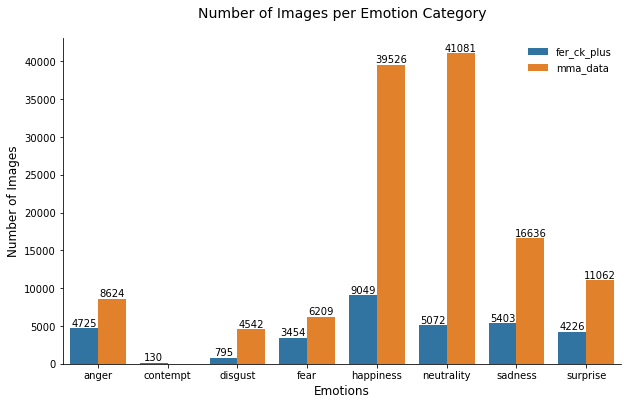

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

chart = sns.barplot(data=data, x='Emotion',y='Number of Images',hue='Dataset')

# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# hide legend's border
plt.legend(frameon=False)

# set plot's title and axis labels
plt.title('Number of Images per Emotion Category', pad=20, fontsize=14)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

# show plot
plt.show()

## Stacked Bar Chart

In [10]:
def getCounts(emotions, data_in):
    '''Returns a list of image counts for each emotion in the emotions list'''
    
    temp_emotion = data_in['Emotion'].to_list()
    temp_count = data_in['Number of Images'].to_list()
    counts = []
    
    for x in emotions:
        if x in temp_emotion:
            index = temp_emotion.index(x)
            counts.append(temp_count[index])
        else:
            counts.append(0)
    
    return counts

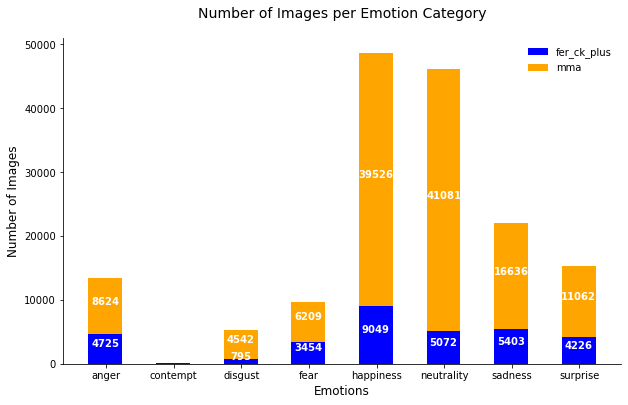

In [11]:
# set the width of the bars and tick positions
bar_width = 0.5
emotions = list(data['Emotion'].unique())         # a list of emotions
ind = list(np.arange(len(emotions)))              # the number of emotions to plot
tick_pos = [i + (bar_width/50) for i in ind]      # tick position for each emotion

# prepare data for plotting
fer_ck_plus = getCounts(emotions, df)
mma_data = getCounts(emotions, df1)

# set plot's size
fig, ax = plt.subplots(figsize=(10,6))

# create bar plots
p1 = plt.bar(ind, fer_ck_plus, bar_width, color='blue',align='center')
p2 = plt.bar(ind, mma_data, bar_width, bottom=fer_ck_plus, color='orange',align='center')

# add some text for labels, title, axes ticks, and legend
plt.ylabel('Number of Images')
plt.xlabel('Emotions')
plt.xticks(tick_pos, emotions)

# set legend
plt.legend((p1, p2), ('fer_ck_plus', 'mma'), frameon=False)

# labels for each bar
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, 
             ha="center", va="bottom", color='white', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, 
             ha="center", va="bottom", color='white', fontweight='bold')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# set plot's title and axis labels
plt.title('Number of Images per Emotion Category', pad=20, fontsize=14)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

# display the bar plot
plt.show()